In [1]:
#This notebook is for analysis on the cBioPortal clinical data
#The goal is to get an idea of how to find related attributes between different studies

#load in packages
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Levenshtein
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size':20})

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
import urllib, json
url = "http://www.cbioportal.org/api/studies"
response = urllib.urlopen(url)
studies = json.loads(response.read())

In [4]:
studyIDs=[]
for study in studies:
    studyIDs.append(study['studyId'])

##Attributes present in studies

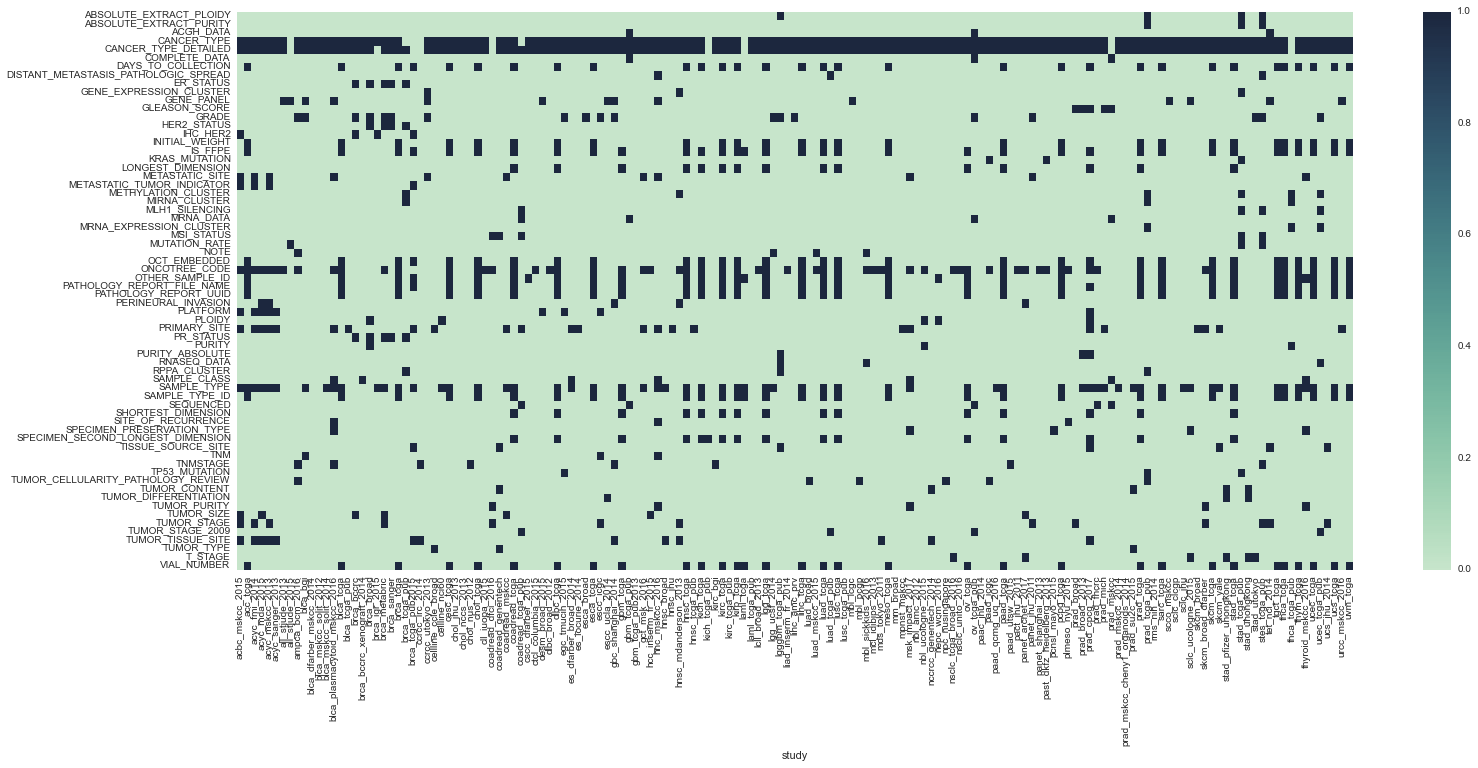

In [12]:
plt.figure(figsize=(25, 10))
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.heatmap(study_data_combined.T>0, cmap=cmap)

##Clustering on attributes for studies on cBioPortal datahub

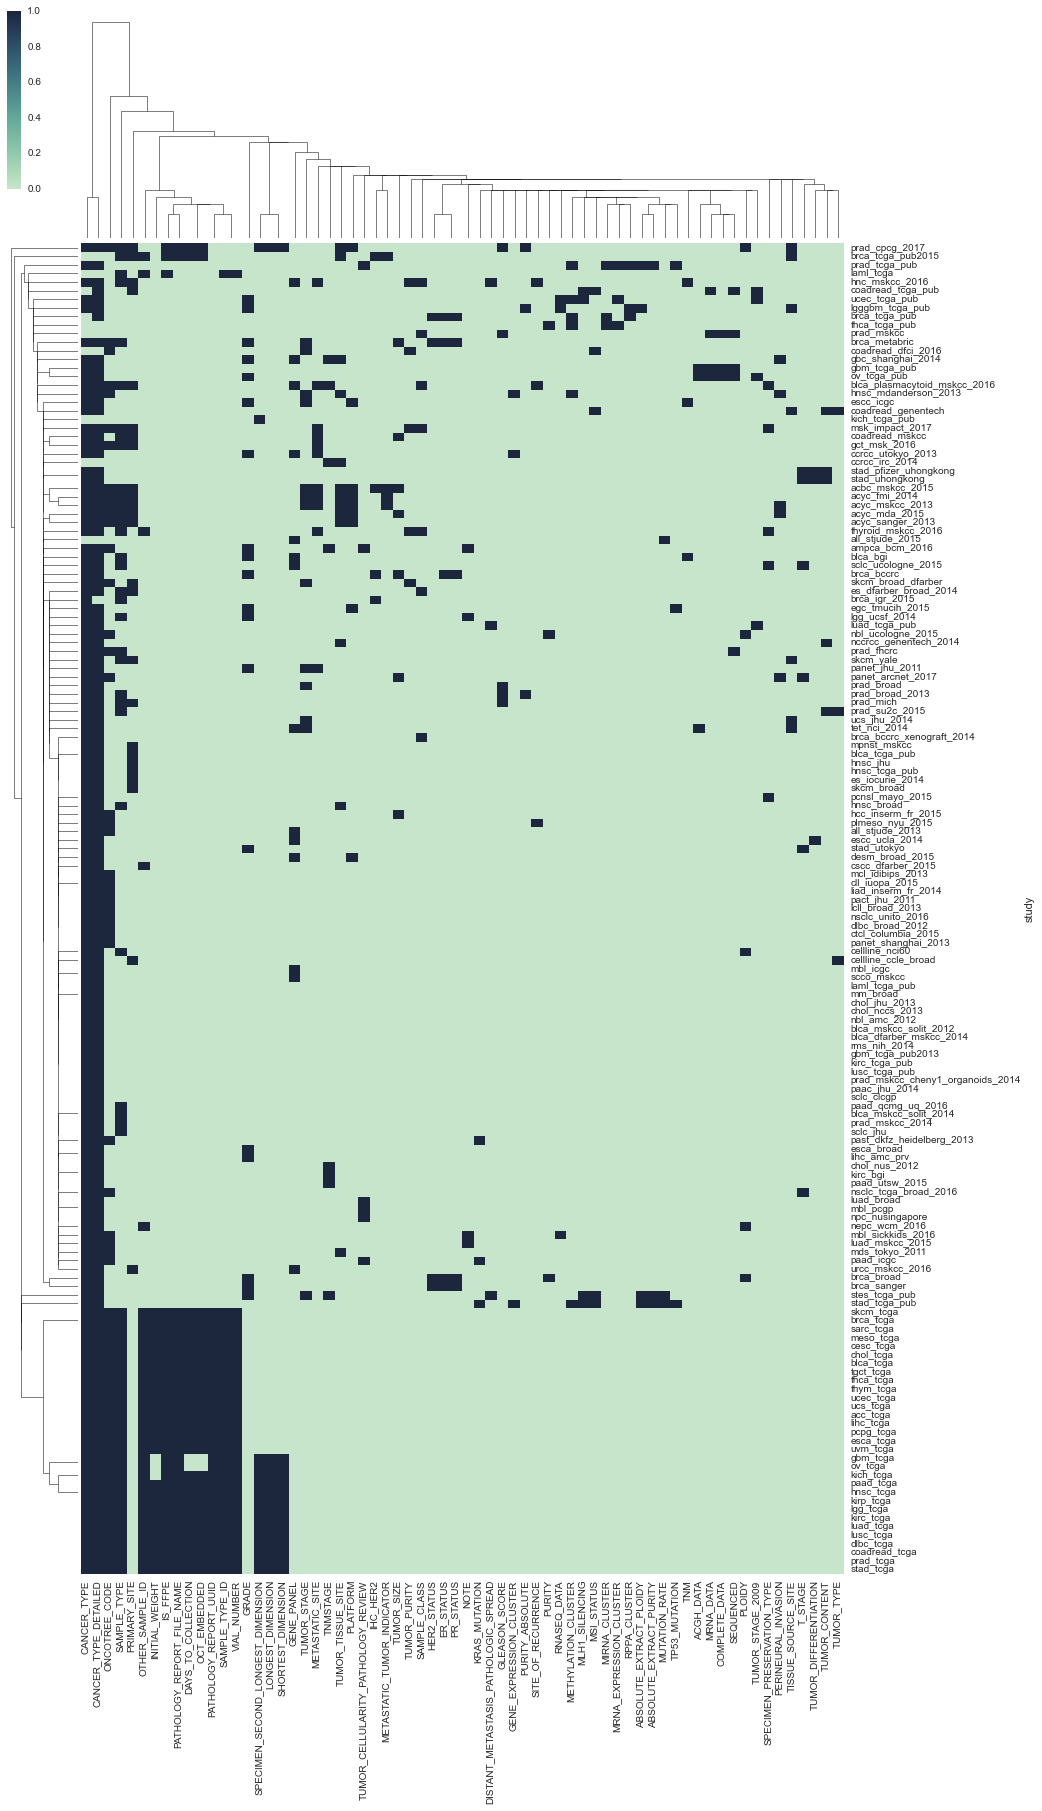

In [13]:
import seaborn
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.clustermap(study_data_combined>0, method='single', metric = 'euclidean', figsize=(15, 28), cmap=cmap)

##It would be helpful to quantify the similarity between the names of the attributes.  The Levenshtein ratio is one way to quantify the similarity between two strings

In [20]:
#calculate the Levenshtein ratio for all pairs
all_col_names = list(study_data_combined)
total_attributes = len(all_col_names)
lev_dist = np.zeros([total_attributes, total_attributes])
for i in range(total_attributes):
    for j in range(i+1,total_attributes):
        lev_dist[i,j]=Levenshtein.ratio(all_col_names[i].upper(), all_col_names[j].upper())

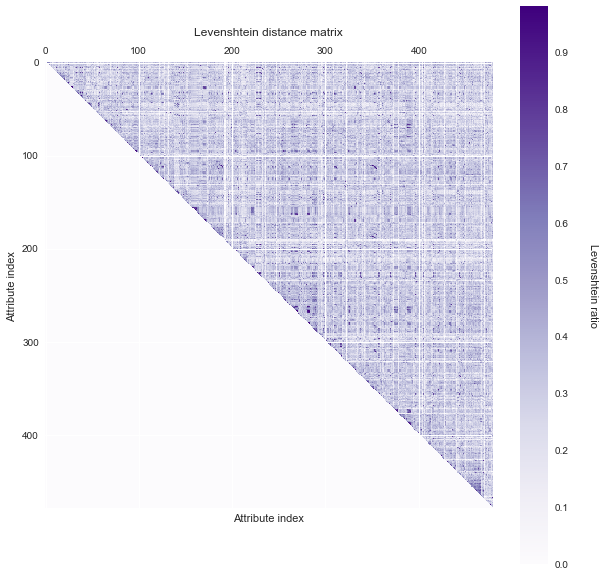

In [21]:
#Let's visualzie the Levenshtein ratio for all possible pairs
plt.rcParams['figure.figsize'] = (10, 10)
plt.matshow(lev_dist, cmap='Purples')
plt.title('Levenshtein distance matrix')
plt.ylabel('Attribute index')
plt.xlabel('Attribute index')
cbar = plt.colorbar()
cbar.set_label("Levenshtein ratio", rotation = 270, labelpad = 30)

##Attributes with a Levenshtein ratio of over 0.90

In [25]:
#let's take a look at the variables that have a Levenshtein ratio of > 0.90
cutoff=0.8
attribute1 = np.where((lev_dist > cutoff))[0]
attribute2 = np.where((lev_dist > cutoff))[1]

#Now let's add an additional filter to make sure the attributes come from different studies
#(this filter is helpful beacuse the same study wouldn't include the same attribute with different names)
for a1, a2 in zip(attribute1,attribute2):
    #if sum(all_data[all_col_names[a1]].notnull() & all_data[all_col_names[a2]].notnull()) == 0:
    print all_col_names[a1], all_col_names[a2]

ABSOLUTE_EXTRACT_PLOIDY ABSOLUTE_EXTRACT_PURITY
AKT1_MUTATION BRCA1_MUTATION
AKT1_MUTATION FOXA1_MUTATION
AKT1_MUTATION KMT2A_MUTATION
AKT1_MUTATION KMT2D_MUTATION
ARID1A_MUTATION IDH1_MUTATION
ARID1A_PROTEIN_CODING KRAS_PROTEIN_CODING
ARID1A_PROTEIN_CODING PIK3CA_PROTEIN_CODING
AR_SCORE ERK_SCORE
ATRX_STATUS DAXX_STATUS
ATRX_STATUS STR_STATUS
AVE_DNA_PURITY AVE_RNA_PURITY
BIOPSY_GLEASON_SCORE BIOPSY_GLEASON_SCORE_1
BIOPSY_GLEASON_SCORE BIOPSY_GLEASON_SCORE_2
BIOPSY_GLEASON_SCORE_1 BIOPSY_GLEASON_SCORE_2
BIOPSY_GLEASON_SCORE_1 GLEASON_SCORE_1
BIOPSY_GLEASON_SCORE_1 PATH_GLEASON_SCORE_1
BIOPSY_GLEASON_SCORE_2 GLEASON_SCORE_2
BIOPSY_GLEASON_SCORE_2 PATH_GLEASON_SCORE_2
BRAF_MUTATION BRCA1_MUTATION
BRAF_MUTATION BRCA2_MUTATION
BRAF_MUTATION HRAS_MUTATION
BRAF_MUTATION KRAS_MUTATION
BRAF_MUTATION RHOA_MUTATION
BRAF_STATUS NRAS_STATUS
BRCA1_GERMLINE_MUT BRCA2_GERMLINE_MUT
BRCA1_MUTATION BRCA2_MUTATION
BRCA1_MUTATION CHD1_MUTATION
BRCA1_MUTATION HRAS_MUTATION
BRCA1_MUTATION KRAS_MUTATION
BRC

##Attributes with a Levenshtein ratio of over 0.80

In [27]:
#let's take a look at the variables that have a Levenshtein ratio of > 0.80
cutoff=0.8
attribute1 = np.where((lev_dist > cutoff))[0]
attribute2 = np.where((lev_dist > cutoff))[1]

#Now let's add an additional filter to make sure the attributes come from different studies
#(this filer is helpful beacuse the same study wouldn't include the same attribute with different names)
for a1, a2 in zip(attribute1,attribute2):
    #if sum(all_data[all_col_names[a1]].notnull() & all_data[all_col_names[a2]].notnull()) == 0:
    print all_col_names[a1], all_col_names[a2]

ABSOLUTE_EXTRACT_PLOIDY ABSOLUTE_EXTRACT_PURITY
AKT1_MUTATION BRCA1_MUTATION
AKT1_MUTATION FOXA1_MUTATION
AKT1_MUTATION KMT2A_MUTATION
AKT1_MUTATION KMT2D_MUTATION
ARID1A_MUTATION IDH1_MUTATION
ARID1A_PROTEIN_CODING KRAS_PROTEIN_CODING
ARID1A_PROTEIN_CODING PIK3CA_PROTEIN_CODING
AR_SCORE ERK_SCORE
ATRX_STATUS DAXX_STATUS
ATRX_STATUS STR_STATUS
AVE_DNA_PURITY AVE_RNA_PURITY
BIOPSY_GLEASON_SCORE BIOPSY_GLEASON_SCORE_1
BIOPSY_GLEASON_SCORE BIOPSY_GLEASON_SCORE_2
BIOPSY_GLEASON_SCORE_1 BIOPSY_GLEASON_SCORE_2
BIOPSY_GLEASON_SCORE_1 GLEASON_SCORE_1
BIOPSY_GLEASON_SCORE_1 PATH_GLEASON_SCORE_1
BIOPSY_GLEASON_SCORE_2 GLEASON_SCORE_2
BIOPSY_GLEASON_SCORE_2 PATH_GLEASON_SCORE_2
BRAF_MUTATION BRCA1_MUTATION
BRAF_MUTATION BRCA2_MUTATION
BRAF_MUTATION HRAS_MUTATION
BRAF_MUTATION KRAS_MUTATION
BRAF_MUTATION RHOA_MUTATION
BRAF_STATUS NRAS_STATUS
BRCA1_GERMLINE_MUT BRCA2_GERMLINE_MUT
BRCA1_MUTATION BRCA2_MUTATION
BRCA1_MUTATION CHD1_MUTATION
BRCA1_MUTATION HRAS_MUTATION
BRCA1_MUTATION KRAS_MUTATION
BRC

##Number of common attributes between pairs of studies

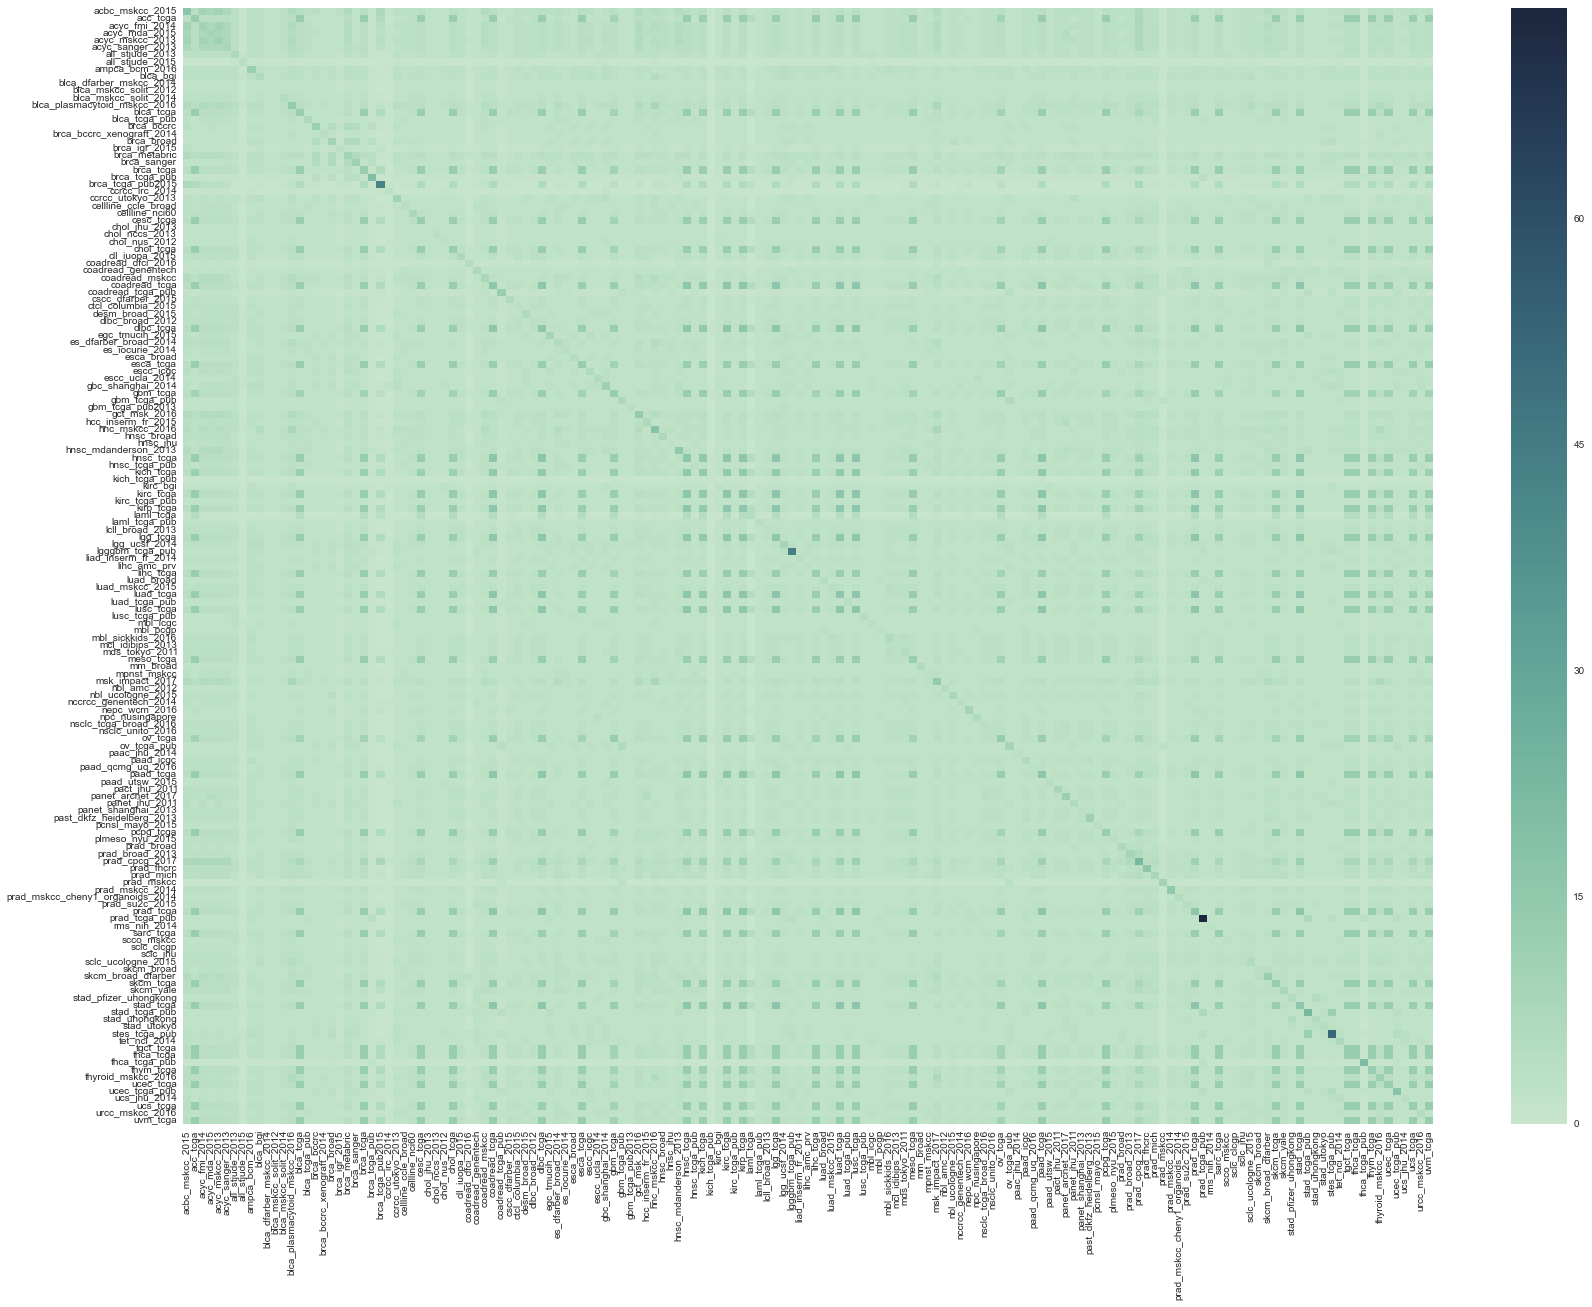

In [30]:
fig, ax = plt.subplots(figsize=(28,20))
cmap=seaborn.cubehelix_palette(rot=-.4, as_cmap=True)
seaborn.heatmap(n_common_attributes, cmap=cmap)

##Distribution of attributes in common for each pair of studies

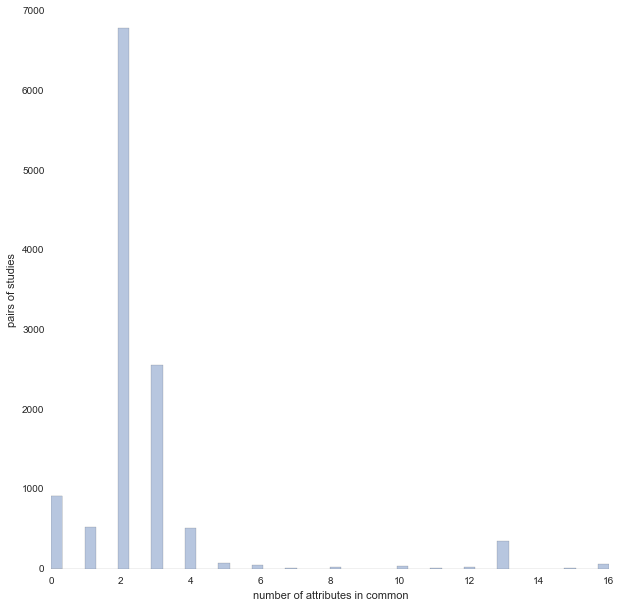

In [41]:
ax=seaborn.distplot(n_attribute_dist, kde=False)
ax.set(ylabel='pairs of studies', xlabel='number of attributes in common')
plt.show()


##Mean number of attributes in common between pairs of studies

In [42]:
total_common_attributes=sum(np.sum(n_common_attributes-np.triu(n_common_attributes)))
n_studies=n_common_attributes.shape[0]
mean_attributes=total_common_attributes/(n_studies*(n_studies-1)/2)
mean_attributes

2.6034352744030165

##Irregular attributes from API

In [37]:
import re
attributes=list(study_data_combined)

irregular_attributes = []
irregular_studies = []
irregular_data = np.empty([0, 2])
for attribute in attributes:
    if not re.match( r'^[A-Za-z0-9_]+$', attribute):
        studies = study_data_combined[study_data_combined[attribute]>0].index
        for study in studies:
            irregular_data = np.vstack([irregular_data, [study, attribute]])

In [39]:
pd.DataFrame(np.sort(irregular_data, axis=0), columns=['study', 'attribute'])

,study,attribute
0,hnc_mskcc_2016,ALP_(U/L)
1,prad_mskcc_cheny1_organoids_2014,LDH_(U/L)
2,prad_mskcc_cheny1_organoids_2014,MYB-NFIB_FISH
3,stes_tcga_pub,RPPA_CLUSTER _GEA
4,stes_tcga_pub,RPPA_CLUSTER _GEA_CIN
